# Hebbian Learning in Financial Applications

In this notebook, we'll implement a simple Hebbian Learning neural network to discover patterns in financial data. Specifically, we'll analyze historical stock prices to identify associations between different stocks based on their price movements.

## Contents

1. Import Libraries
2. Load and Preprocess Financial Data
3. Define the Hebbian Learning Neural Network
4. Train the Network Using Hebbian Learning
5. Visualize Learned Associations
6. Interpretation of Results


In [1]:
# 1. Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


## 2. Load and Preprocess Financial Data

We'll fetch historical stock price data for several major companies using the `yfinance` library.


In [2]:
# Define the list of stock tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JPM', 'BAC', 'WFC', 'XOM', 'CVX']

# Fetch historical price data
data = yf.download(tickers, start='2020-01-01', end='2022-12-31')['Adj Close']

# Display the first few rows
data.head()


[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,BAC,CVX,GOOGL,JPM,MSFT,TSLA,WFC,XOM
Date,,,,,,,,,,
2020-01-02,72.796028,94.900497,31.647987,97.225243,68.264961,122.104652,153.630646,28.684000,47.053127,55.631172
2020-01-03,72.088310,93.748497,30.990887,96.888985,67.907852,120.493279,151.717728,29.534000,46.764248,55.183926
2020-01-06,72.662712,95.143997,30.946466,96.560692,69.717865,120.397446,152.109909,30.102667,46.484127,55.607635
2020-01-07,72.320976,95.343002,30.742233,95.327675,69.583206,118.350655,150.722992,31.270666,46.098927,55.152542
2020-01-08,73.484344,94.598503,31.053028,94.238747,70.078476,119.273888,153.123734,32.809334,46.239010,54.320816


We will fill any missing data using the forward fill method and compute daily returns.


In [3]:
# Handle missing data
data.fillna(method='ffill', inplace=True)

# Compute daily returns
returns = data.pct_change().dropna()

# Display the first few rows of returns
returns.head()


C:\Users\bbrel\AppData\Local\Temp\ipykernel_22692\4282963966.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Ticker,AAPL,AMZN,BAC,CVX,GOOGL,JPM,MSFT,TSLA,WFC,XOM
Date,,,,,,,,,,
2020-01-03,-0.009722,-0.012139,-0.020763,-0.003459,-0.005231,-0.013197,-0.012451,0.029633,-0.006139,-0.008039
2020-01-06,0.007968,0.014886,-0.001433,-0.003388,0.026654,-0.000795,0.002585,0.019255,-0.005990,0.007678
2020-01-07,-0.004703,0.002092,-0.006600,-0.012769,-0.001931,-0.017000,-0.009118,0.038801,-0.008287,-0.008184
2020-01-08,0.016086,-0.007809,0.010110,-0.011423,0.007118,0.007801,0.015928,0.049205,0.003039,-0.015080
2020-01-09,0.021241,0.004799,0.001716,-0.001614,0.010498,0.003651,0.012493,-0.021945,-0.001704,0.007656


## 3. Define the Hebbian Learning Neural Network

We'll create a simple neural network model where each neuron represents a stock, and the synaptic weights represent the strength of association between stocks based on their return correlations.

The Hebbian learning rule we'll use is:

$[
\Delta w_{ij} = \eta \, x_i \, x_j
]$

Where:

- $\Delta w_{ij}$ is the change in weight between neuron $i$ and neuron $j$
- $\eta$ is the learning rate
- $x_i$ and $x_j$ are the activations of neurons $i$ and $j$ respectively


In [4]:
# Initialize weights matrix
num_stocks = len(tickers)
weights = np.zeros((num_stocks, num_stocks))

# Set learning rate
eta = 0.01


## 4. Train the Network Using Hebbian Learning

We'll iterate over the returns data and update the weights according to the Hebbian learning rule.


In [5]:
# Normalize the returns to have zero mean and unit variance
normalized_returns = (returns - returns.mean()) / returns.std()

# Convert DataFrame to NumPy array
data_array = normalized_returns.values

# Hebbian Learning
for t in range(data_array.shape[0]):
    x = data_array[t].reshape(num_stocks, 1)  # Column vector
    delta_w = eta * np.dot(x, x.T)            # Outer product
    weights += delta_w


## 5. Visualize Learned Associations

We'll visualize the synaptic weights matrix to see the learned associations between stocks.


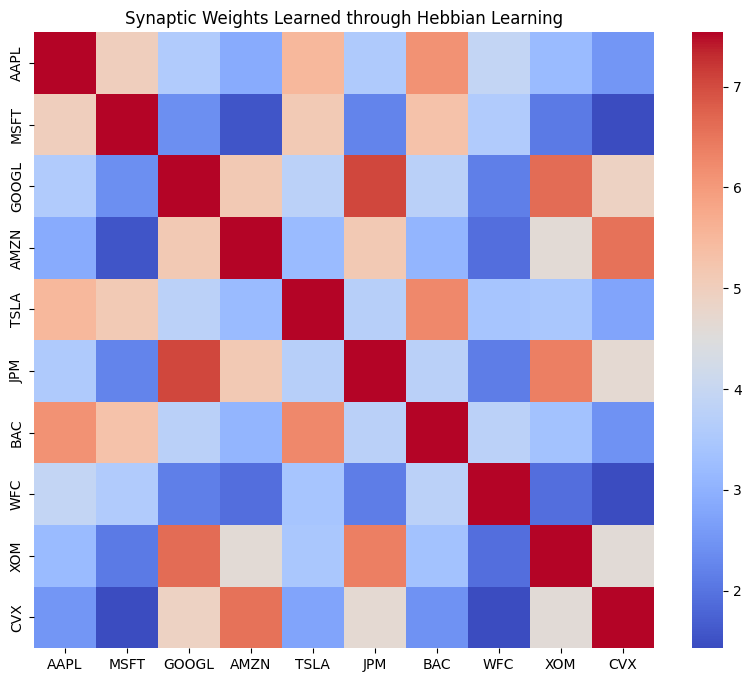

In [6]:
# Create a DataFrame for weights
weights_df = pd.DataFrame(weights, index=tickers, columns=tickers)

# Plot heatmap of weights
plt.figure(figsize=(10, 8))
sns.heatmap(weights_df, annot=False, cmap='coolwarm')
plt.title('Synaptic Weights Learned through Hebbian Learning')
plt.show()


## 6. Interpretation of Results

The heatmap shows the strength of associations between different stocks. A higher positive value indicates that two stocks tend to move together, while a negative value indicates that they move in opposite directions.

By analyzing the synaptic weights, we can identify clusters of stocks that are closely associated, which can be useful for portfolio diversification and risk management.

For example:

- **Tech Stocks**: Companies like Apple (`AAPL`), Microsoft (`MSFT`), Google (`GOOGL`), and Amazon (`AMZN`) may show strong positive associations due to similar market influences.
- **Banking Stocks**: JPMorgan Chase (`JPM`), Bank of America (`BAC`), and Wells Fargo (`WFC`) might form another cluster.
- **Energy Stocks**: ExxonMobil (`XOM`) and Chevron (`CVX`) could exhibit strong associations.

Understanding these associations helps in constructing portfolios that either capitalize on these correlations or diversify to reduce risk.


---

**Note**: The results are based on historical data from 2020 to 2022 and are for illustrative purposes only. In practice, financial analysis should consider a broader range of factors and more sophisticated models.

---



.

### Explanation

#### Structure of the Provided Network

- **Single-Layer Network**: Each neuron represents a stock, and the synaptic weights between neurons represent the strength of association between those stocks.
- **Hebbian Learning Rule**: The network updates the weights using the basic Hebbian Learning rule:

  \[
  \Delta w_{ij} = \eta \, x_i \, x_j
  \]

  Where:
  - \( \Delta w_{ij} \) is the change in weight between neuron \( i \) and neuron \( j \).
  - \( \eta \) is the learning rate.
  - \( x_i \) and \( x_j \) are the activations of neurons \( i \) and \( j \), respectively.

##

#### Comparison

- **Depth**: The network in the notebook lacks hidden layers; it operates with a single layer where all neurons are interconnected.
- **Learning Mechanism**: It uses unsupervised Hebbian Learning rather than supervised learning methods commonly used in training DNNs.
- **Complexity**: The network captures linear associations between stocks but doesn't learn hierarchical or complex features that DNNs are capable of.

### How to Extend to a Deep Neural Network

If you're interested in developing a DNN using Hebbian Learning principles for financial applications, consider the following:

#### Incorporate Hidden Layers

- **Multiple Layers**: Add one or more hidden layers to the network to capture more complex relationships.
- **Layer-wise Hebbian Learning**: Apply Hebbian Learning rules to each layer, allowing the network to learn representations at different levels of abstraction.

#### Combine with Other Learning Rules

- **Unsupervised Pre-training**: Use Hebbian Learning to initialize the weights in a DNN before fine-tuning with supervised methods like backpropagation.
- **Hybrid Models**: Integrate Hebbian Learning with supervised learning to benefit from both unsupervised feature discovery and goal-oriented training.

#### Implement Non-Linear Activations

- **Activation Functions**: Introduce non-linear activation functions to enable the network to model non-linear relationships in financial data.
- **Example**: Use functions like ReLU (Rectified Linear Unit) to allow the network to learn more complex patterns.

#### Consider Advanced Hebbian Variants

- **Oja's Rule**: Prevent unbounded growth of weights by normalizing weight updates.
- **Spike-Timing-Dependent Plasticity (STDP)**: Incorporate timing information if working with time-series data.

### Example Outline for a Hebbian-Based DNN in Finance

1. **Input Layer**: Financial indicators (e.g., stock prices, volumes, technical indicators).
2. **Hidden Layers**: Multiple layers with neurons representing abstract features learned from the input data.
3. **Output Layer**: Targets such as predicted stock prices, classifications (e.g., buy/sell signals), or risk assessments.
4. **Training Process**:
   - **Unsupervised Pre-training**: Use Hebbian Learning to initialize weights in the hidden layers.
   - **Supervised Fine-tuning**: Apply backpropagation with labeled data to refine the network's predictions.
5. **Activation Functions**: Implement non-linear activation functions in neurons to capture complex relationships.

### Conclusion

The example provided demonstrates the application of Hebbian Learning in a simple neural network for financial data analysis. While it is not a Deep Neural Network, it serves as a foundation for understanding how Hebbian principles can be applied.

If you're interested in developing a Hebbian-based DNN for your financial application, you can:

- **Add Hidden Layers**: Increase the network's depth to learn hierarchical features.
- **Adjust Learning Rules**: Incorporate advanced Hebbian variants and combine them with supervised learning techniques.
- **Enhance the Model**: Include non-linear activations and other deep learning practices to improve performance.

---

Let me know if you'd like assistance in building a Hebbian-based DNN or if you have any other questions!
